## Logistic regression for Iris dataset

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [15]:
data = pd.read_csv('IrisNew.csv')
print(data)
df = pd.DataFrame(data, columns=["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"])

     Sepal Length  Sepal Width  Petal Length  Petal Width      Class
0             4.3          3.0           1.1          0.1     setosa
1             4.4          2.9           1.4          0.2     setosa
2             4.4          3.0           1.3          0.2     setosa
3             4.4          3.2           1.3          0.2     setosa
4             4.5          2.3           1.3          0.3     setosa
..            ...          ...           ...          ...        ...
145           7.7          2.6           6.9          2.3  virginica
146           7.7          2.8           6.7          2.0  virginica
147           7.7          3.0           6.1          2.3  virginica
148           7.7          3.8           6.7          2.2  virginica
149           7.9          3.8           6.4          2.0  virginica

[150 rows x 5 columns]


In [16]:
X = df.values[:,0:4] # first 4 columns are independent variables
Y = df.values[:,4] # last column is dependent variable


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=100)
#test size = 70% training and 30% testing



['virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'setosa']


Accuracy: 0.9555555555555556


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Confusion Matrix:



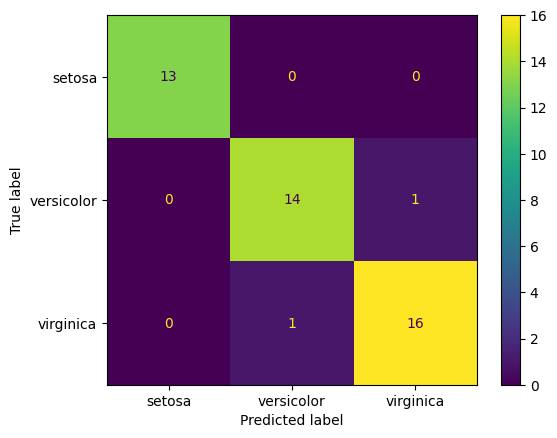

In [17]:
#preprocessing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
logistic_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)
print(y_pred)
print("\n")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=logistic_reg.classes_)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\n")
print("Classification Report:\n", classification_rep)
print("\n")
print("Confusion Matrix:\n")
disp.plot()
plt.show()

In [64]:
#ranking of the results of the logistic regression model using the model’s predict_proba method

y_probabilities = logistic_reg.predict_proba(X_test)

# Assuming y_probabilities is an array of shape (n_samples, n_classes), you can rank the results
# based on the predicted probabilities for each class.
ranking = np.argsort(-y_probabilities, axis=1)  # Sort in descending order
print("Ranking of Results (Top 3 classes for each sample):\n", np.array(logistic_reg.classes_[ranking[:, :3]]))

Ranking of Results (Top 3 classes for each sample):
 [['virginica' 'versicolor' 'setosa']
 ['setosa' 'versicolor' 'virginica']
 ['virginica' 'versicolor' 'setosa']
 ['setosa' 'versicolor' 'virginica']
 ['virginica' 'versicolor' 'setosa']
 ['virginica' 'versicolor' 'setosa']
 ['versicolor' 'setosa' 'virginica']
 ['setosa' 'versicolor' 'virginica']
 ['virginica' 'versicolor' 'setosa']
 ['setosa' 'versicolor' 'virginica']
 ['setosa' 'versicolor' 'virginica']
 ['versicolor' 'virginica' 'setosa']
 ['setosa' 'versicolor' 'virginica']
 ['setosa' 'versicolor' 'virginica']
 ['virginica' 'versicolor' 'setosa']
 ['versicolor' 'virginica' 'setosa']
 ['versicolor' 'setosa' 'virginica']
 ['virginica' 'versicolor' 'setosa']
 ['virginica' 'versicolor' 'setosa']
 ['virginica' 'versicolor' 'setosa']
 ['versicolor' 'virginica' 'setosa']
 ['setosa' 'versicolor' 'virginica']
 ['virginica' 'versicolor' 'setosa']
 ['setosa' 'versicolor' 'virginica']
 ['versicolor' 'virginica' 'setosa']
 ['virginica' 'versico

In [19]:
new_data = np.array([[5.8, 2.8, 5.1, 2.4], [6.0, 2.2, 4.0, 1.0]])

# Standardize the new data using the same scaler as before
new_data_standardized = scaler.transform(new_data)

# Predict probabilities for each class
predicted_probabilities = logistic_reg.predict_proba(new_data_standardized)

# Assuming you have classes names for reference, e.g., ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]
class_names = ["setosa", "versicolor", "virginica"]

# Rank the classes based on predicted probabilities for each new data record
rankings = np.argsort(-predicted_probabilities, axis=1)

# Print the rankings for each new data record
for i, new_record in enumerate(new_data):
    print(f"Ranking for New Record {i + 1}:")
    for j, rank in enumerate(rankings[i]):
        class_name = class_names[rank]
        probability = predicted_probabilities[i][rank]
        print(f"Rank {j + 1}: {class_name} (Probability: {probability:.4f})")

Ranking for New Record 1:
Rank 1: virginica (Probability: 0.9621)
Rank 2: versicolor (Probability: 0.0376)
Rank 3: setosa (Probability: 0.0002)
Ranking for New Record 2:
Rank 1: versicolor (Probability: 0.9507)
Rank 2: virginica (Probability: 0.0418)
Rank 3: setosa (Probability: 0.0074)


In [20]:
# Create and train the Decision tree model with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [21]:
# Create and train the Decision tree model with gini index
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 52)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=52)

Accuracy: 0.9555555555555556


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Confusion Matrix:



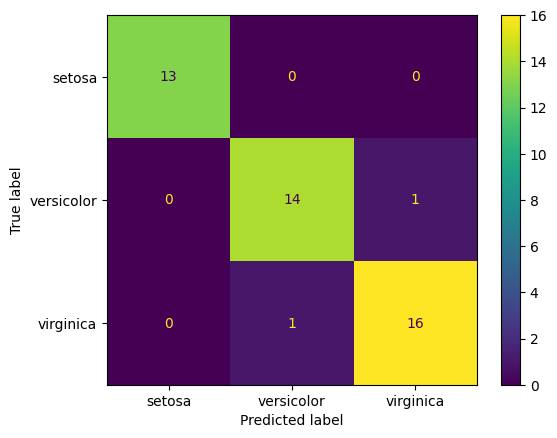

In [22]:
# Evaluate the Decision tree with entropy on test data
y_pred = clf_entropy.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=logistic_reg.classes_)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\n")
print("Classification Report:\n", classification_rep)
print("\n")
print("Confusion Matrix:\n")
disp.plot()
plt.show()

Accuracy: 0.9555555555555556


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Confusion Matrix:



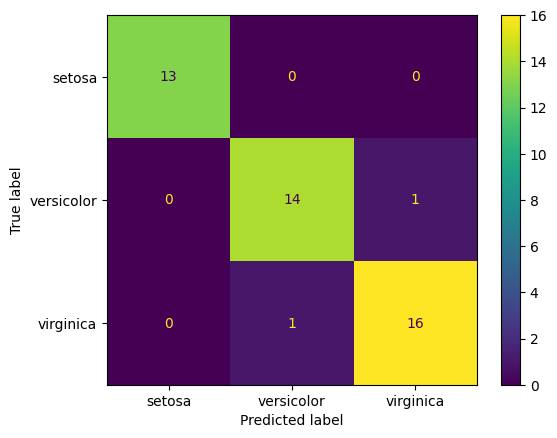

In [23]:
# Evaluate the Decision tree with gini on test data
y_pred = clf_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=logistic_reg.classes_)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\n")
print("Classification Report:\n", classification_rep)
print("\n")
print("Confusion Matrix:\n")
disp.plot()
plt.show()

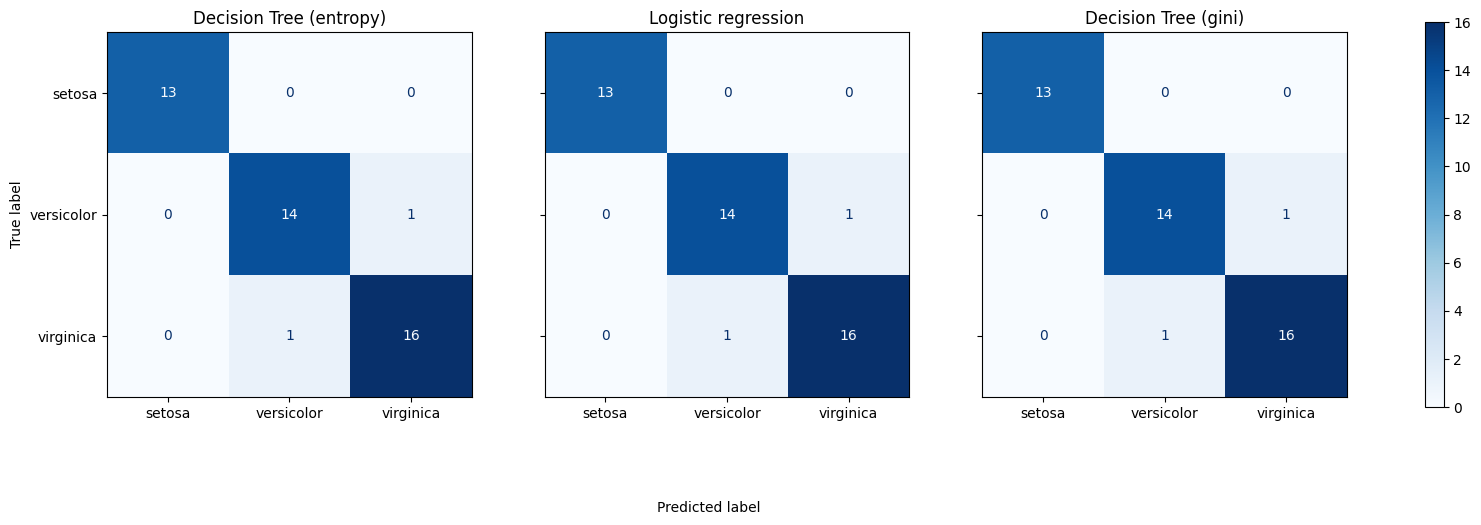

In [67]:
# code inspired from 'https://stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side'
# Plotting all confusion matrices together

setosa_f1_scores = []
versicolor_f1_scores = []
virginica_f1_scores = []
accuracies = []

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')
# Evaluate the Decision tree with entropy on test data
y_pred = clf_entropy.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=logistic_reg.classes_)
classification_rep = classification_report(y_test, y_pred, output_dict=True)
setosa_f1_scores.append(classification_rep['setosa']['f1-score'])
versicolor_f1_scores.append(classification_rep['versicolor']['f1-score'])
virginica_f1_scores.append(classification_rep['virginica']['f1-score'])
accuracies.append(classification_rep['accuracy'])

disp.plot(ax=axes[0], cmap=plt.cm.Blues,values_format='g')
disp.ax_.set_title('Decision Tree (entropy)')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')

y_pred = []
# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=logistic_reg.classes_)
classification_rep = classification_report(y_test, y_pred, output_dict=True)
setosa_f1_scores.append(classification_rep['setosa']['f1-score'])
versicolor_f1_scores.append(classification_rep['versicolor']['f1-score'])
virginica_f1_scores.append(classification_rep['virginica']['f1-score'])
accuracies.append(classification_rep['accuracy'])

disp.plot(ax=axes[1], cmap=plt.cm.Blues,values_format='g')
disp.ax_.set_title('Logistic regression')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')

y_pred = []

# Evaluate the Decision tree with gini on test data
y_pred = clf_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=logistic_reg.classes_)
classification_rep = classification_report(y_test, y_pred, output_dict=True)
setosa_f1_scores.append(classification_rep['setosa']['f1-score'])
versicolor_f1_scores.append(classification_rep['versicolor']['f1-score'])
virginica_f1_scores.append(classification_rep['virginica']['f1-score'])
accuracies.append(classification_rep['accuracy'])

disp.plot(ax=axes[2], cmap=plt.cm.Blues,values_format='g')
disp.ax_.set_title('Decision Tree (gini)')
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')

f.text(0.4, -0.1, 'Predicted label', ha='left')
f.colorbar(disp.im_, ax=axes)
plt.savefig("res2.png")
plt.show()

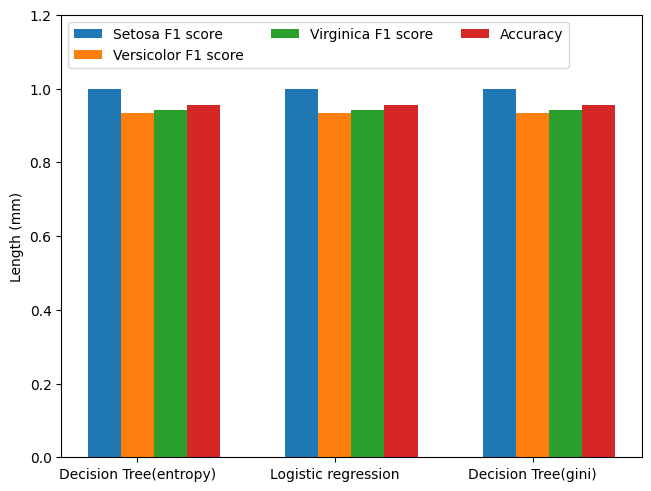

In [65]:
# code taken and slightly modified from 'https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html'
x_labels = ['Decision Tree(entropy)', 'Logistic regression', 'Decision Tree(gini)']
x = np.arange(len(x_labels))
width = 0.167
multiplier = 0
fig, ax = plt.subplots(layout='constrained')
plot_scores = {
    'Setosa F1 score': setosa_f1_scores,
    'Versicolor F1 score': versicolor_f1_scores,
    'Virginica F1 score': virginica_f1_scores,
    'Accuracy': accuracies,
}

for attribute, measurement in plot_scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
# ax.set_title('F1 scores and Accuracy for each species of Iris dataset using different models')
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)
plt.savefig('res3.png')
plt.show()

## Logistic Regression for Wiki Pass/Fail example data

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Input data (Hours of study)
X = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]).reshape(-1, 1)

# Target data (Pass or Fail, where 1 represents Pass and 0 represents Fail)
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


[0 1 1 0]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Model evaluation

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Input data (Hours of study)
X = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]).reshape(-1, 1)

# Target data (Pass or Fail, where 1 represents Pass and 0 represents Fail)
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Create and train the logistic regression model
logistic_reg = LogisticRegression(penalty=None)
logistic_reg.fit(X, y)

# Values of study hours for which you want to calculate probabilities
study_hours = np.array([1, 2, 2.7,3, 4, 5]).reshape(-1, 1)

# Calculate probabilities of passing for the given study hours
probabilities = logistic_reg.predict_proba(study_hours)[:, 1]

# Print the probabilities
for hours, probability in zip(study_hours, probabilities):
    print(f"Study Hours: {hours[0]}, Probability of Passing: {probability:.4f}")


Study Hours: 1.0, Probability of Passing: 0.0709
Study Hours: 2.0, Probability of Passing: 0.2557
Study Hours: 2.7, Probability of Passing: 0.4962
Study Hours: 3.0, Probability of Passing: 0.6074
Study Hours: 4.0, Probability of Passing: 0.8744
Study Hours: 5.0, Probability of Passing: 0.9691


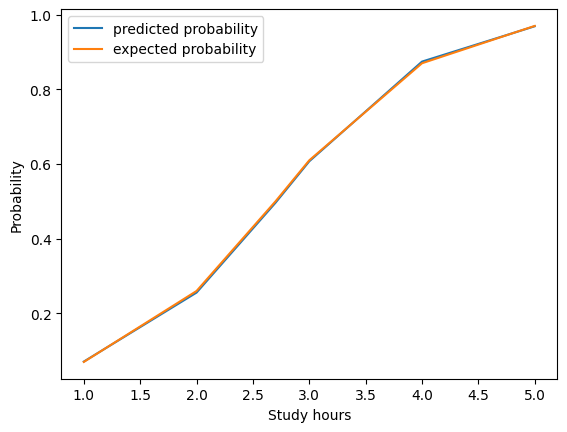

In [12]:
plt.plot(study_hours, probabilities)
plt.plot(study_hours, [0.07, 0.26, 0.50, 0.61, 0.87, 0.97])
plt.legend(['predicted probability', 'expected probability'])
plt.xlabel('Study hours')
plt.ylabel('Probability')
plt.savefig('res1.png')
plt.show()